In [3]:
rm(list=ls())
setwd("/pool0/data/tushark/pysumma/")
library(circlize)

In [4]:
chord_plot <- function(fname, remove_diag=TRUE) {
    df <- read.csv(fname)
    dm <- data.matrix(df)[,-1]
    if (remove_diag) {
        diag(dm) <- NA
    }
    return(chorddiag(dm, groupnamePadding=20, showTicks=FALSE, showGroupnames=FALSE))
}

data_chord <- function(mat, remove_diag=TRUE) {
    mat <- data.matrix(mat)
    varnames <- c('Evaporation', 'Precipitation', 'SWE', 'Soil Liquid', 'Runoff')
    colors <- c('#3472c6', '#83a83b', '#c44e52', '#8172b2', '#ff914d')
    return(chorddiag(mat, groupColors=colors, groupnamePadding=20, showTicks=FALSE))
}

data_diff <- function(f1, f2, remove_diag=TRUE) { 
    df1 <- read.csv(f1)
    dm1 <- data.matrix(df1)[,-1]
    df2 <- read.csv(f2)
    dm2 <- data.matrix(df2)[,-1]
    if (remove_diag) {
        diag(dm1) <- NA
        diag(dm2) <- NA
    }
    diff <- dm1 - dm2
    diff_pos <- diff
    diff_pos[diff_pos < 0] <- NA
    diff_neg <- -1 * diff
    diff_neg[diff_neg < 0] <- NA
    return(list(diff_pos, diff_neg))
}

get_matrix <- function(fname, remove_diag=TRUE) {
    df <- read.csv(fname)
    dm <- data.matrix(df)[,-1]
    varnames <- c('Precipitation', 'Temperature', 'Soil Moisture', 'Latent Heat', 'Sensible Heat', 'Shortwave')
    rownames(dm) <- varnames
    colnames(dm) <- varnames
    if (remove_diag) {
        diag(dm) <- NA
    }
    return(dm)
}

In [5]:
fnames <- list.files(path="./data", pattern="*.csv")

In [7]:
mat <- get_matrix('./data/ElSaler_output_difTrans_exponential_BallBerry.csv', remove_diag=TRUE)
mat

,Precipitation,Temperature,Soil Moisture,Latent Heat,Sensible Heat,Shortwave
Precipitation,NA,0,0,0.00000000,0.0000000,0.00000000
Temperature,0,NA,0,0.00000000,0.0000000,0.00000000
Soil Moisture,0,0,NA,0.11424703,0.3933387,0.10784759
Latent Heat,0,0,0,NA,0.2486881,0.08790657
Sensible Heat,0,0,0,0.17846337,NA,1.14066753
Shortwave,0,0,0,0.09004328,0.9403506,NA


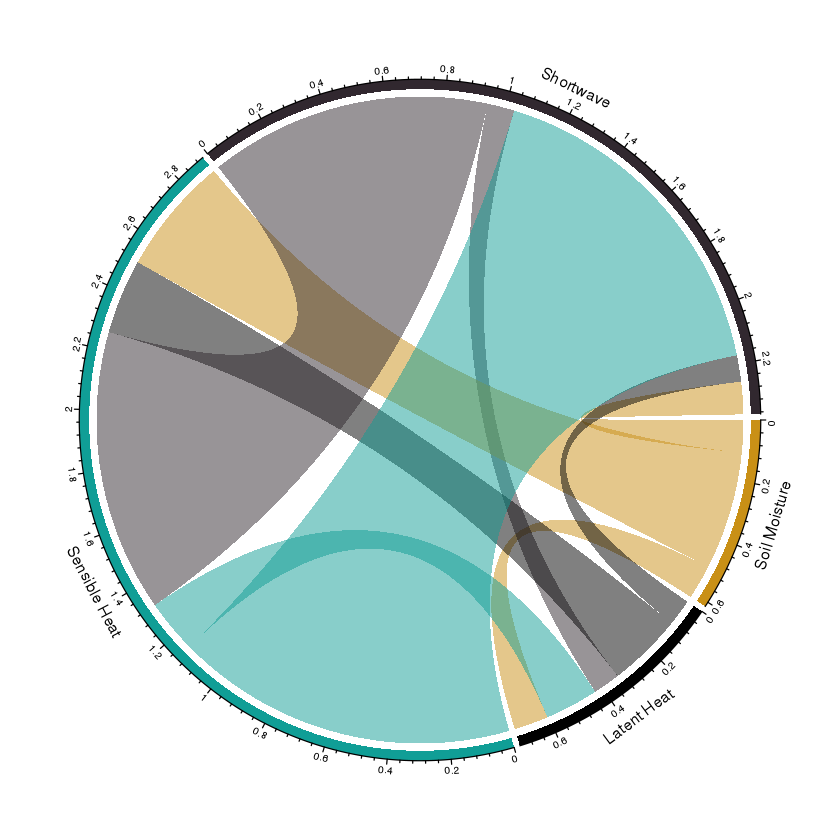

In [11]:
chordDiagram(mat)

In [9]:
mat2 <- get_matrix('./data/ElSaler_output_difTrans_exponential_Jarvis.csv', remove_diag=TRUE)
mat2

,Precipitation,Temperature,Soil Moisture,Latent Heat,Sensible Heat,Shortwave
Precipitation,NA,0,0,0.00000000,0.0000000,0.00000000
Temperature,0,NA,0,0.00000000,0.0000000,0.00000000
Soil Moisture,0,0,NA,0.06865831,0.3610389,0.06924584
Latent Heat,0,0,0,NA,0.2857018,0.19314355
Sensible Heat,0,0,0,0.15990993,NA,1.05565739
Shortwave,0,0,0,0.11235331,1.0059370,NA


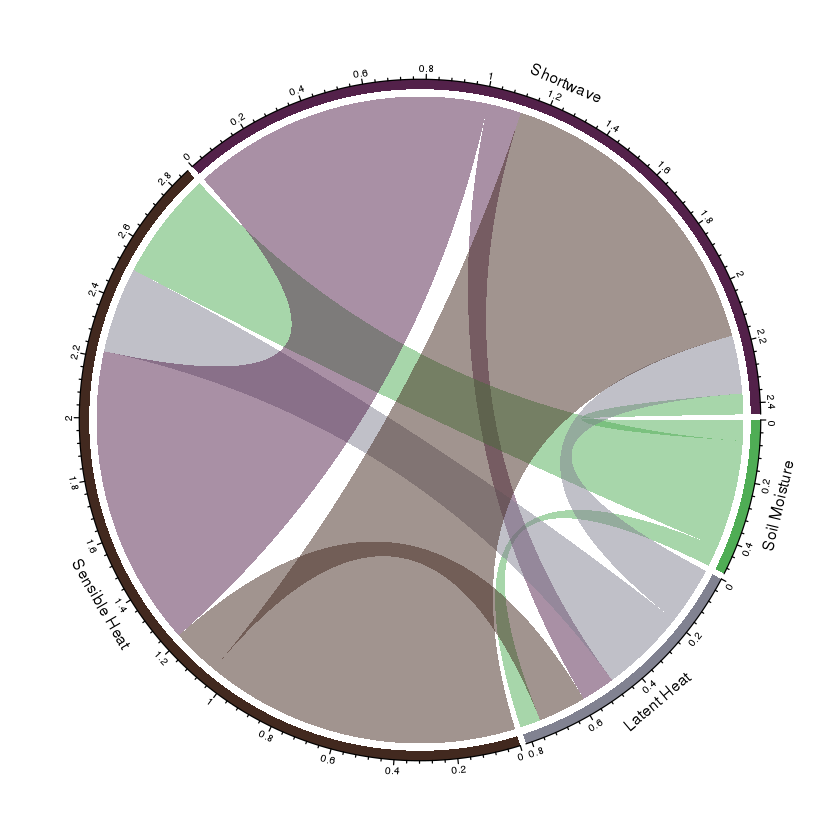

In [10]:
chordDiagram(mat2)